In [48]:
# import all the necessary packages 
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from collections import Counter 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from matplotlib import rcParams

In [49]:
# load the data 
data = pd.read_csv('values.csv')
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [50]:
# Perform basic checks and EDA(Exploratory Data Analysis) 
data.shape
# dataset contains 180 rows and 15 columns 

(180, 15)

In [51]:
Counter(data.heart_disease_present)
# 0 represents no heart disease present(100 patients)
# 1 represents heart disease present(80 patients)

Counter({0: 100, 1: 80})

In [52]:
# check for any missing Values.  
data.isnull().sum()
#As we see there are no missing values present 

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

# Inorder to convert categorical data to numerical type, we use get_dummies function 

In [53]:
dataset = pd.get_dummies(data, columns = ['thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved'])

In [54]:
# Define X(independent variable) and y(dependent variable) 
X = data.iloc[:,:-1]
y = data.heart_disease_present

In [55]:
# perform label encoding 
enc = LabelEncoder()
X.patient_id = enc.fit_transform(X.patient_id)
X.thal = enc.fit_transform(X.thal)
X.serum_cholesterol_mg_per_dl = enc.fit_transform(X.serum_cholesterol_mg_per_dl)
X.oldpeak_eq_st_depression = enc.fit_transform(X.oldpeak_eq_st_depression)
X.head(3)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,6,1,1,128,2,0,0,2,101,0,1,45,170,0
1,147,2,1,110,3,0,0,0,33,16,0,54,158,0
2,172,1,1,125,4,3,0,2,99,0,1,77,162,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [57]:
# defining the model 
model = DecisionTreeClassifier()

In [58]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7962962962962963

In [59]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,25,6
1,5,18


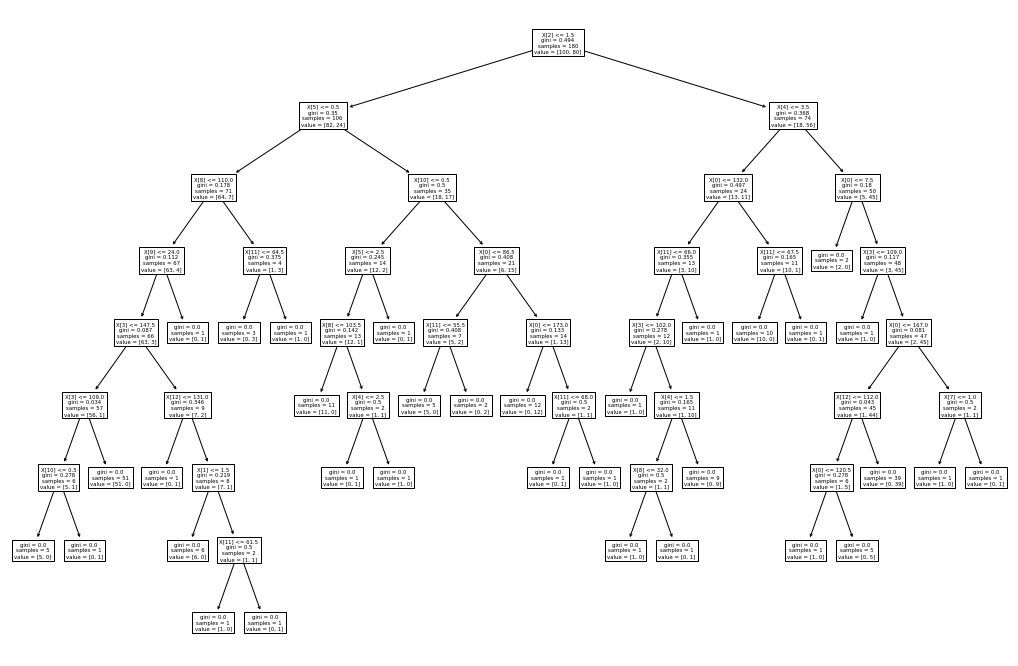

In [67]:
rcParams['figure.figsize'] = 18,12
dtc = tree.DecisionTreeClassifier(random_state=10)
dtc = dtc.fit(X,y)
tree.plot_tree(dtc)
plt.show()